In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("house_price.csv")

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
data.shape

(1460, 81)

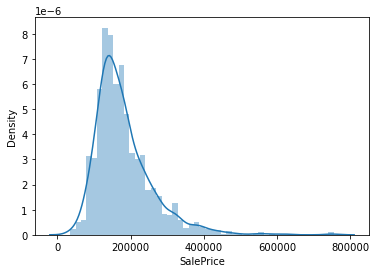

In [5]:
sns.distplot(data.SalePrice);

In [6]:
#counts = data.isnull().count()
#missing = data.isnull().sum().sort_values(ascending=False)
#missing[missing>0]
#percentage_missing = (missing/counts)
#percentage_missing = percentage_missing[percentage_missing>0].sort_values(ascending=False)
#missing_data = pd.concat([missing,percentage_missing],axis=1,keys=["Counts","percentage"])
#missing_data.dropna(inplace=True)
#missing_data.to_excel("missing_data.xlsx")

In [21]:
def missing(df):
    counts = df.isnull().count()
    missing = df.isnull().sum().sort_values(ascending=False)
    percentage_missing = (missing/counts)
    percentage_missing = percentage_missing[percentage_missing>0].sort_values(ascending=False)
    missing_data = pd.concat([missing,percentage_missing],axis=1,keys=["Counts","percentage"])
    missing_data.dropna(inplace=True)
    shape = missing_data.shape[0]
    
    if shape != 0:
        return print("no. of columns:",shape),print(missing_data)
    else:
        return print("no missing data!")

In [24]:
def missing_1():
    counts = data.isnull().count()
    missing = data.isnull().sum().sort_values(ascending=False)
    percentage_missing = round((missing/counts),3)
    percentage_missing = percentage_missing[percentage_missing>0].sort_values(ascending=False)
    missing_data = pd.concat([missing,percentage_missing],axis=1,keys=["Counts","percentage"])
    missing_data.dropna(inplace=True)
    shape = missing_data.shape[0]
    return print("no. of columns:",shape),print(missing_data)

In [9]:
missing(df=data)

no. of columns: 19
              Counts  percentage
PoolQC          1453    0.995205
MiscFeature     1406    0.963014
Alley           1369    0.937671
Fence           1179    0.807534
FireplaceQu      690    0.472603
LotFrontage      259    0.177397
GarageYrBlt       81    0.055479
GarageCond        81    0.055479
GarageType        81    0.055479
GarageFinish      81    0.055479
GarageQual        81    0.055479
BsmtFinType2      38    0.026027
BsmtExposure      38    0.026027
BsmtQual          37    0.025342
BsmtCond          37    0.025342
BsmtFinType1      37    0.025342
MasVnrArea         8    0.005479
MasVnrType         8    0.005479
Electrical         1    0.000685


(None, None)

In [10]:
for i in ("MasVnrArea","PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageType","GarageFinish",
          "GarageQual","BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond","BsmtFinType1","MasVnrType","Electrical"):
    data[i].fillna("none",inplace=True)

In [11]:
missing(df=data)

no. of columns: 2
             Counts  percentage
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479


(None, None)

In [12]:
data["MasVnrArea"].replace("none","NA",inplace=True)

In [13]:
missing(df=data)

no. of columns: 2
             Counts  percentage
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479


(None, None)

In [14]:
data["MasVnrArea"].replace("NA",data["MasVnrArea"].mode()[0],inplace=True)

In [15]:
missing(df=data)

no. of columns: 2
             Counts  percentage
LotFrontage     259    0.177397
GarageYrBlt      81    0.055479


(None, None)

In [16]:
data["GarageYrBlt"].fillna(0,inplace=True)

In [17]:
missing(df=data)

no. of columns: 1
             Counts  percentage
LotFrontage     259    0.177397


(None, None)

In [18]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [22]:
missing(df=data)

no missing data!


In [30]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [33]:
data["OverallQual"]

0       7
1       6
2       7
3       7
4       8
       ..
1455    6
1456    6
1457    7
1458    5
1459    5
Name: OverallQual, Length: 1460, dtype: int64

In [64]:
cat_var = data.select_dtypes(exclude=[np.number]).columns

In [65]:
cat_var

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
le = LabelEncoder()

In [79]:
for c in cat_var:
    data[c] = le.fit_transform(data[c])

In [80]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [89]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning           int64
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType           int64
SaleCondition      int64
SalePrice          int64
Length: 81, dtype: object

In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [99]:
transform = ss.fit_transform(data)
data_ss = pd.DataFrame(transform, index=data.index, columns = data.columns)

In [100]:
data_ss

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,-0.231877,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.437043,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,-0.098093,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,-0.454850,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.615421,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.045532,-0.365661,-0.260560,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,0.620891,-0.614439,0.313867,0.208502,-0.074560
1456,1.723747,-0.872563,-0.045532,0.660016,0.266407,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,-1.390058,0.191594,-0.087688,-1.599111,1.645210,0.313867,0.208502,0.366161
1457,1.726120,0.309859,-0.045532,-0.187282,-0.147810,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,-3.237563,-4.759330,4.953112,-0.489110,1.645210,0.313867,0.208502,1.077611
1458,1.728492,-0.872563,-0.045532,-0.098093,-0.080160,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,0.063305,0.457447,0.191594,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.488523


In [102]:
from sklearn.decomposition import PCA

In [104]:
pca = PCA(n_components=79)

In [105]:
y_pca = pca.fit_transform(data_ss)

In [106]:
y_pca

array([[ 1.83865469,  0.46052057, -1.96033804, ...,  0.06087621,
        -0.09961573,  0.04264804],
       [ 0.37124721, -2.10688948,  1.04532449, ..., -0.15551998,
         0.03299682, -0.09836641],
       [ 2.4497781 ,  0.21981794, -1.53737754, ...,  0.04478226,
        -0.11302157,  0.25924431],
       ...,
       [ 1.87721268,  2.412625  ,  1.18715603, ..., -0.36886803,
         0.12017823,  0.3055715 ],
       [-2.67862427, -3.00566675,  1.53009078, ..., -0.0552226 ,
         0.07920603,  0.02158941],
       [-0.72792009, -2.87260224,  1.23638047, ..., -0.23952243,
        -0.07953058, -0.13214777]])

In [107]:
print(pca.explained_variance_ratio_)

[0.13886584 0.05043343 0.04581317 0.03646949 0.03108414 0.02739805
 0.02597175 0.02392406 0.02209083 0.02151096 0.02087917 0.01978182
 0.01901284 0.01771491 0.01689816 0.01602485 0.01519248 0.01506543
 0.01440768 0.0142676  0.01385502 0.01367746 0.01347779 0.01312202
 0.01284791 0.01229439 0.01204172 0.01194503 0.01165772 0.01131211
 0.01124518 0.01099147 0.01080078 0.01044582 0.01032601 0.00985665
 0.00970192 0.00956637 0.00931125 0.00900243 0.00873258 0.00852058
 0.00833992 0.00815716 0.00790468 0.00772325 0.00758512 0.00728915
 0.00708351 0.00673159 0.00645857 0.00614106 0.00572155 0.00543485
 0.0053262  0.00514893 0.0050493  0.00472705 0.0046386  0.00450262
 0.00444432 0.00410829 0.00394354 0.00385317 0.00367754 0.00319975
 0.00313145 0.00280172 0.00268226 0.00262745 0.00253268 0.00203997
 0.00173228 0.0016333  0.00148439 0.00126399 0.00122103 0.00113303
 0.00098786]
